# Datenjournalismus in Python - 
# Eine praktische Einführung in die Programmierung


### Natalie Widmann




Wintersemester 2022 / 2023


Universität Leipzig





### Ziel

Wir visualisieren die Daten im EM-DAT Datensatz und bauen ein Länderdashboard damit.


![Datenpipeline](../imgs/datapipeline.png)

In [2]:
# Install a pip package im Jupyter Notebook
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable


In [66]:
import pandas as pd
data = pd.read_csv('../data/clean_emdat.csv', index_col=0)

In [67]:
data

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
1,1900,Cabo Verde,Climatological,Drought,Drought,1,11000.0,11000.0,NaN,3.077091
2,1900,India,Climatological,Drought,Drought,1,1250000.0,1250000.0,NaN,3.077091
3,1900,Jamaica,Hydrological,Flood,No Subtype,1,300.0,300.0,NaN,3.077091
4,1900,Japan,Geophysical,Volcanic activity,Ash fall,1,30.0,30.0,NaN,3.077091
5,1900,Turkey,Geophysical,Earthquake,Ground movement,1,140.0,140.0,NaN,3.077091
...,...,...,...,...,...,...,...,...,...,...
10338,2022,Yemen,Hydrological,Flood,Flash flood,1,3400.0,13.0,NaN,NaN
10339,2022,South Africa,Hydrological,Flood,No Subtype,7,143119.0,562.0,3.164000e+09,NaN
10340,2022,Zambia,Hydrological,Flood,No Subtype,1,15000.0,3.0,NaN,NaN
10341,2022,Zimbabwe,Hydrological,Flood,No Subtype,1,0.0,0.0,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10342 entries, 1 to 10342
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          10342 non-null  int64  
 1   Country                       10342 non-null  object 
 2   Disaster Subroup              10342 non-null  object 
 3   Disaster Type                 10342 non-null  object 
 4   Disaster Subtype              10342 non-null  object 
 5   Total Events                  10342 non-null  int64  
 6   Total Affected                10342 non-null  float64
 7   Total Deaths                  10342 non-null  float64
 8   Total Damage (USD, original)  3796 non-null   float64
 9   CPI                           10149 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 888.8+ KB


## Das Dashboard...

## Recherchefragen

- Wie viele Todesopfer gibt es in einem Land?
- Wie stark ist ein Land von Naturkatastrophen betroffen?
- Welchen Anteil haben die unterschiedlichen Naturkatastrophentypen daran?
- Wie hat sich die Anzahl der Naturkatastrophen über die Jahre hin entwickelt?

### Wie viele Todesopfer gibt es in einem Land?

#### Wie viele Todesopfer gibt es insgesamt?

In [11]:
data["Total Deaths"].sum()

22845977.0

#### Wie viele Todesopfer gibt es insgesamt in Deutschland?

In [12]:
data['Country'] == 'Germany'

1        False
2        False
3        False
4        False
5        False
         ...  
10338    False
10339    False
10340    False
10341    False
10342    False
Name: Country, Length: 10342, dtype: bool

In [13]:
data[data['Country'] == 'Germany']

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
3121,1990,Germany,Meteorological,Storm,No Subtype,6,64.0,64.0,4.440000e+09,48.218797
3289,1991,Germany,Meteorological,Storm,No Subtype,1,0.0,0.0,5.000000e+06,50.260853
3431,1992,Germany,Geophysical,Earthquake,Ground movement,1,1525.0,1.0,5.000000e+07,51.783162
3432,1992,Germany,Hydrological,Flood,No Subtype,1,0.0,0.0,3.010000e+07,51.783162
3582,1993,Germany,Hydrological,Flood,Riverine flood,1,100000.0,5.0,6.000000e+08,53.311620
...,...,...,...,...,...,...,...,...,...,...
9469,2019,Germany,Meteorological,Storm,Convective storm,1,1.0,1.0,NaN,94.349092
9708,2020,Germany,Meteorological,Storm,Extra-tropical storm,1,33.0,0.0,NaN,95.512967
9952,2021,Germany,Hydrological,Flood,No Subtype,1,1000.0,197.0,4.000000e+10,100.000000
9953,2021,Germany,Meteorological,Storm,Convective storm,2,604.0,1.0,NaN,100.000000


#### Korrektur der Ländernamen für Deutschland

In [24]:
# Vorkommen von Deutschland
for country in data['Country'].unique():
    if 'german' in country.lower():
        print(country)

Germany Fed Rep
Germany Dem Rep
Germany


Schreibe eine Funktion die dies bereinigt.

**Eingabe**: beliebiger Ländername (bspw. Indonesia, Belgium, Germany Fed Rep, etc.)

**Ausgabe**: der Ländername oder Germany falls einer der oben gelisteten Namen eingegeben wurde

In [31]:
def clean_country(land):
    if 'german' in land.lower():
        return 'Germany'
    else:
        return land

In [41]:
text = 'Germany Fed Rep'
clean_text = clean_country(text)
print(clean_text)

Germany


Anwendung der Funktion auf alle Werte einer Spalte

In [42]:
new_unique_countries = []
for country in data['Country'].unique():
    corrected_name = clean_country(country)
    new_unique_countries.append(corrected_name)
print(len(new_unique_countries))

225


In [43]:
len(data['Country'].unique())

225

In [46]:
for index, row in data.iterrows():
    data.loc[index, "Country"] = clean_country(row['Country'])

In [47]:
help(data.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - An alignable boolean Series. The index of the key will be aligned before
 |    masking.
 |  - An alignable Index. The Index of the returned selection will be the input.
 |  - A ``callable`

In [45]:
data[data['Country'] == 'Germany']

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
140,1920,Germany,Hydrological,Flood,No Subtype,1,0.0,0.0,2.000000e+07,7.409635
170,1925,Germany,Hydrological,Flood,No Subtype,1,0.0,0.0,1.900000e+07,6.486508
183,1926,Germany,Hydrological,Flood,No Subtype,1,0.0,0.0,3.100000e+07,6.548049
219,1929,Germany,Meteorological,Storm,Convective storm,1,0.0,0.0,5.500000e+07,6.351116
549,1953,Germany,Meteorological,Storm,Convective storm,1,0.0,0.0,2.500000e+07,9.895924
...,...,...,...,...,...,...,...,...,...,...
9469,2019,Germany,Meteorological,Storm,Convective storm,1,1.0,1.0,NaN,94.349092
9708,2020,Germany,Meteorological,Storm,Extra-tropical storm,1,33.0,0.0,NaN,95.512967
9952,2021,Germany,Hydrological,Flood,No Subtype,1,1000.0,197.0,4.000000e+10,100.000000
9953,2021,Germany,Meteorological,Storm,Convective storm,2,604.0,1.0,NaN,100.000000


**Alternative Lösungsmöglichkeit** (viel übersichtlicher und effizienter)

mit `apply()` kann eine Funktion auf eine komplette Spalte oder Zeile des Dataframes angewendet werden

In [68]:
data['Country'] = data['Country'].apply(clean_country)

In [69]:
data[data['Country'] == 'Germany']

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
140,1920,Germany,Hydrological,Flood,No Subtype,1,0.0,0.0,2.000000e+07,7.409635
170,1925,Germany,Hydrological,Flood,No Subtype,1,0.0,0.0,1.900000e+07,6.486508
183,1926,Germany,Hydrological,Flood,No Subtype,1,0.0,0.0,3.100000e+07,6.548049
219,1929,Germany,Meteorological,Storm,Convective storm,1,0.0,0.0,5.500000e+07,6.351116
549,1953,Germany,Meteorological,Storm,Convective storm,1,0.0,0.0,2.500000e+07,9.895924
...,...,...,...,...,...,...,...,...,...,...
9469,2019,Germany,Meteorological,Storm,Convective storm,1,1.0,1.0,NaN,94.349092
9708,2020,Germany,Meteorological,Storm,Extra-tropical storm,1,33.0,0.0,NaN,95.512967
9952,2021,Germany,Hydrological,Flood,No Subtype,1,1000.0,197.0,4.000000e+10,100.000000
9953,2021,Germany,Meteorological,Storm,Convective storm,2,604.0,1.0,NaN,100.000000


#### Wie viele Todesopfer gab es insgesamt in Deutschland?

In [70]:
data[data['Country'] == 'Germany']['Total Deaths'].sum()

10419.0

In [71]:
data_germany = data[data['Country'] == 'Germany']
data_germany['Total Deaths'].sum()

10419.0

#### Wie viele Todesopfer gab es insgesamt in Indien?

In [59]:
data_land = data[data['Country'] == 'India']
data_land['Total Deaths'].sum()

4591827.0

#### Allgemeine Funktion die Gesamtzahl der Todesopfer eines Landes ausgibt

In [60]:
def get_total_deaths(data, country):
    data_land = data[data['Country'] == country]
    return data_land['Total Deaths'].sum()

In [62]:
get_total_deaths(data, 'Japan')

239400.0

## Dashboard Teil II

### Welchen Anteil haben die unterschiedlichen Naturkatastrophentypen in Deutschland?

In [75]:
germany_data = data[data['Country'] == 'Germany']
germany_data['Disaster Type'].value_counts(normalize=True)

Storm                   0.540230
Flood                   0.264368
Extreme temperature     0.137931
Earthquake              0.034483
Wildfire                0.011494
Landslide               0.011494
Name: Disaster Type, dtype: float64

# Visualisierung von DataFrames

[Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Matplotlib makes easy things easy and hard things possible.

Install matplotlib:

In [76]:
!pip3 install --upgrade pip
!pip3 install --upgrade Pillow
!pip3 install matplotlib

import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [77]:
germany_data = data[data['Country'] == 'Germany']

In [78]:
germany_data['Disaster Type'].value_counts()

Storm                   47
Flood                   23
Extreme temperature     12
Earthquake               3
Wildfire                 1
Landslide                1
Name: Disaster Type, dtype: int64

<AxesSubplot: >

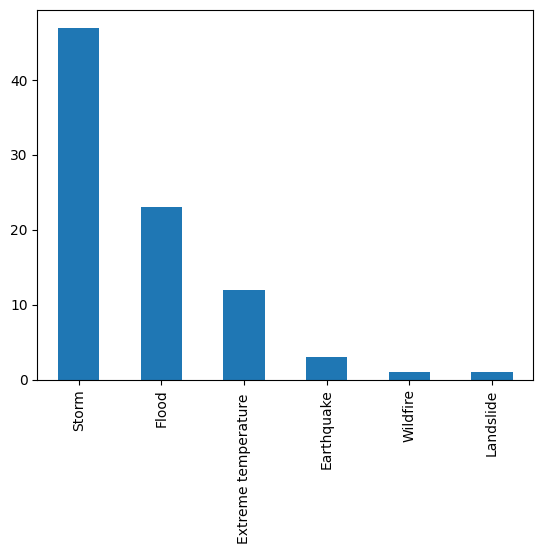

In [80]:
germany_data['Disaster Type'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Disaster Type'>

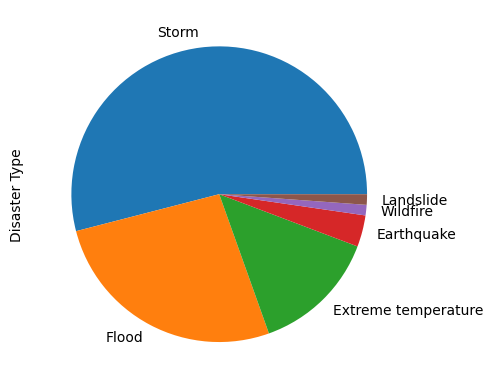

In [81]:
germany_data['Disaster Type'].value_counts().plot(kind='pie')

## Recherchefragen

#### Welche Naturkatastrophen fordern die meisten Todesopfer?

`.groupby()` gruppiert einen DataFrame nach den Werten einer oder mehreren Spalten.

Die Spalten nach denen man Gruppieren möchte werden als Argument übergeben. Danach folgt die gewünschte Berechnung auf dieser Gruppe. Das Ergebnis wird als DataFrame zurückgegeben. 

In [82]:
data

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
1,1900,Cabo Verde,Climatological,Drought,Drought,1,11000.0,11000.0,NaN,3.077091
2,1900,India,Climatological,Drought,Drought,1,1250000.0,1250000.0,NaN,3.077091
3,1900,Jamaica,Hydrological,Flood,No Subtype,1,300.0,300.0,NaN,3.077091
4,1900,Japan,Geophysical,Volcanic activity,Ash fall,1,30.0,30.0,NaN,3.077091
5,1900,Turkey,Geophysical,Earthquake,Ground movement,1,140.0,140.0,NaN,3.077091
...,...,...,...,...,...,...,...,...,...,...
10338,2022,Yemen,Hydrological,Flood,Flash flood,1,3400.0,13.0,NaN,NaN
10339,2022,South Africa,Hydrological,Flood,No Subtype,7,143119.0,562.0,3.164000e+09,NaN
10340,2022,Zambia,Hydrological,Flood,No Subtype,1,15000.0,3.0,NaN,NaN
10341,2022,Zimbabwe,Hydrological,Flood,No Subtype,1,0.0,0.0,NaN,NaN


In [83]:
data['Total Deaths'].sum()

22845977.0

In [84]:
data.groupby('Disaster Type')['Total Deaths'].sum()

Disaster Type
Animal accident                12.0
Drought                  11733889.0
Earthquake                2343594.0
Extreme temperature        194056.0
Flood                     7002950.0
Fog                          4000.0
Glacial lake outburst         262.0
Insect infestation              0.0
Landslide                   67417.0
Mass movement (dry)          4644.0
Storm                     1403607.0
Volcanic activity           86893.0
Wildfire                     4653.0
Name: Total Deaths, dtype: float64

In [86]:
data.groupby('Disaster Type').sum()

/tmp/ipykernel_480056/3612715955.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Disaster Type').sum()


,Year,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
Disaster Type,,,,,,
Animal accident,2014,1,5.000000e+00,12.0,0.000000e+00,87.366298
Drought,1543555,792,2.869852e+09,11733889.0,2.098881e+11,43039.824471
Earthquake,2134925,1576,2.052983e+08,2343594.0,8.653494e+11,46522.663819
Extreme temperature,1115693,607,1.038223e+08,194056.0,6.886634e+10,38106.532522
Flood,7604541,5730,3.967537e+09,7002950.0,9.771118e+11,239869.775450
Fog,1952,1,4.000000e+03,4000.0,0.000000e+00,9.822074
Glacial lake outburst,4043,3,3.600000e+01,262.0,2.100000e+08,100.000000
Insect infestation,183314,95,2.802200e+06,0.0,2.292000e+08,4880.908507
Landslide,1277348,789,1.480567e+07,67417.0,1.125893e+10,36989.405750


In [ ]:
data.groupby('Disaster Type').sum()

`.groupby()` kann auch auf mehrere Spalten gleichzeitig angewendet werden

In [87]:
data.groupby(['Disaster Type', 'Disaster Subtype'])['Total Deaths'].sum()

Disaster Type          Disaster Subtype                
Animal accident        No Subtype                                12.0
Drought                Drought                             11733812.0
                       No Subtype                                77.0
Earthquake             Ground movement                      2075949.0
                       No Subtype                               221.0
                       Tsunami                               267424.0
Extreme temperature    Cold wave                              17765.0
                       Heat wave                             172555.0
                       Severe winter conditions                3736.0
Flood                  Coastal flood                           5352.0
                       Flash flood                            70835.0
                       No Subtype                           2480837.0
                       Riverine flood                       4445926.0
Fog                    No Subtype 

### Visualisierung

<AxesSubplot: ylabel='Total Deaths'>

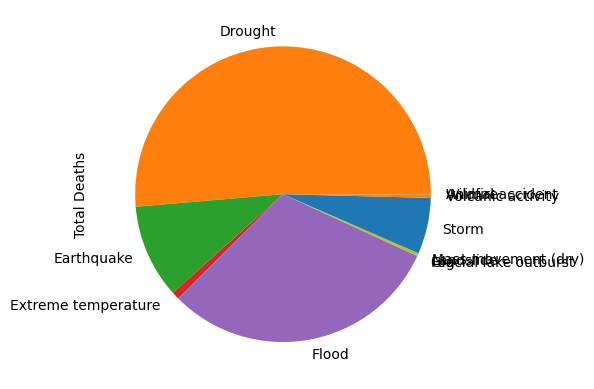

In [88]:
data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie')

#### Welche Naturkatastrophen fordern die meisten Todesopfer in Deutschland?

<AxesSubplot: ylabel='Total Deaths'>

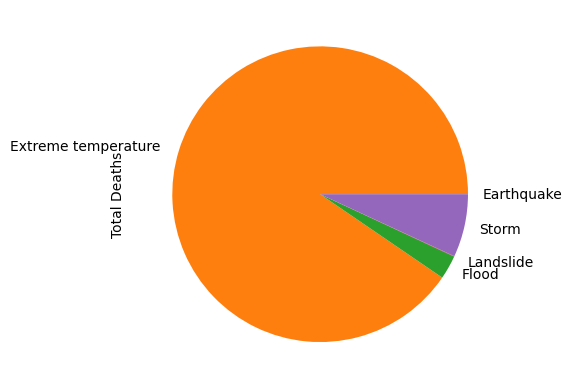

In [89]:
germany_data = data[data['Country'] == 'Germany']
germany_data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie')

<AxesSubplot: ylabel='Total Deaths'>

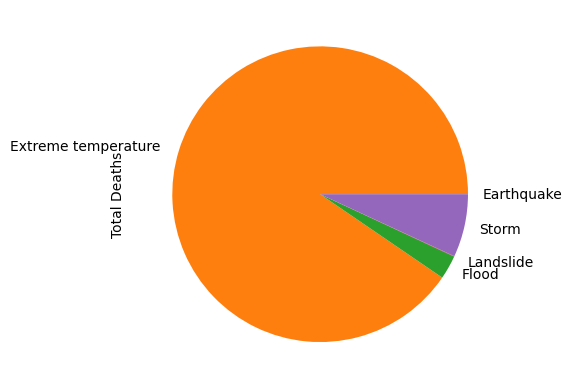

In [90]:
data[data['Country'] == 'Germany'].groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie')

#### Generelle Funktion

In [ ]:
country = 'India'
country_data = data[data['Country'] == country]
country_data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie')

In [93]:
def plot_death_by_disastertype(data, country):
    country_data = data[data['Country'] == country]
    country_data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie')

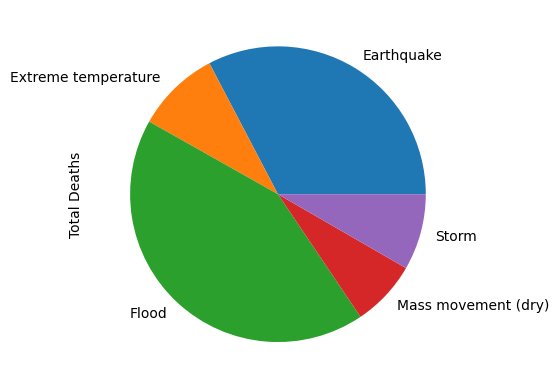

In [96]:
plot_death_by_disastertype(data, 'Egypt')

## Dashboard Teil III

#### Wie hat sich die Anzahl der Naturkatastrophen über die Jahre hin entwickelt?

**Berechne für jedes Jahr die Summe aus allen `Events`**

In [100]:
data.groupby('Year')['Total Events'].sum()

Year
1900      6
1901      1
1902     10
1903     12
1904      4
       ... 
2018    320
2019    404
2020    395
2021    432
2022    315
Name: Total Events, Length: 123, dtype: int64

In [109]:
data['Total Events'].sum()

14943

In [112]:
data.groupby('Year').min()

,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
Year,,,,,,,,,
1900,Cabo Verde,Climatological,Drought,Ash fall,1,30.0,30.0,30000000.0,3.077091
1901,Japan,Geophysical,Earthquake,Tsunami,1,24.0,18.0,NaN,3.077091
1902,Azerbaijan,Geophysical,Earthquake,Ash fall,1,125.0,86.0,25000000.0,3.200175
1903,Canada,Climatological,Drought,Ash fall,1,0.0,0.0,480000000.0,3.323258
1904,Bangladesh,Geophysical,Earthquake,Ground movement,1,0.0,0.0,NaN,3.323258
...,...,...,...,...,...,...,...,...,...
2018,Afghanistan,Climatological,Drought,Ash fall,1,0.0,0.0,36000.0,92.669670
2019,Afghanistan,Biological,Drought,Ash fall,1,0.0,0.0,4000000.0,94.349092
2020,Afghanistan,Biological,Drought,Ash fall,1,0.0,0.0,1500000.0,95.512967


In [116]:
data[['Total Events', 'Year']].groupby('Year')['Total Events'].sum()

Year
1900      6
1901      1
1902     10
1903     12
1904      4
       ... 
2018    320
2019    404
2020    395
2021    432
2022    315
Name: Total Events, Length: 123, dtype: int64

In [113]:
yearly_events

14943

<AxesSubplot: title={'center': 'Anzahl an Naturkatastrophen pro Jahr'}, xlabel='Year'>

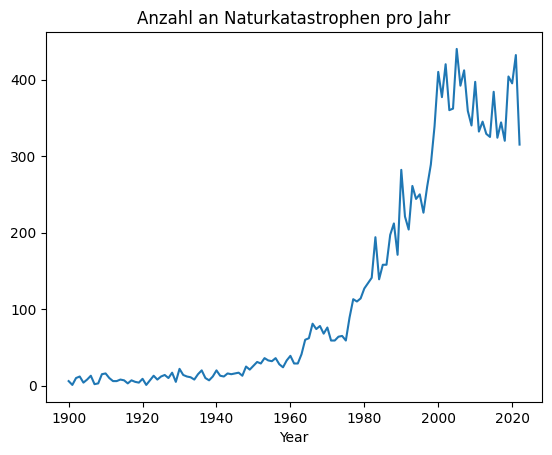

In [114]:
yearly_events = data.groupby('Year')['Total Events'].sum()
yearly_events.plot(kind='line', x='Year', y='Total Events', title='Anzahl an Naturkatastrophen pro Jahr')

**Plotte für Deutschland die Entwicklung der Anzahl an Naturkatastrophen über die Jahre hinweg**

<AxesSubplot: title={'center': 'Anzahl an Naturkatastrophen pro Jahr'}, xlabel='Year'>

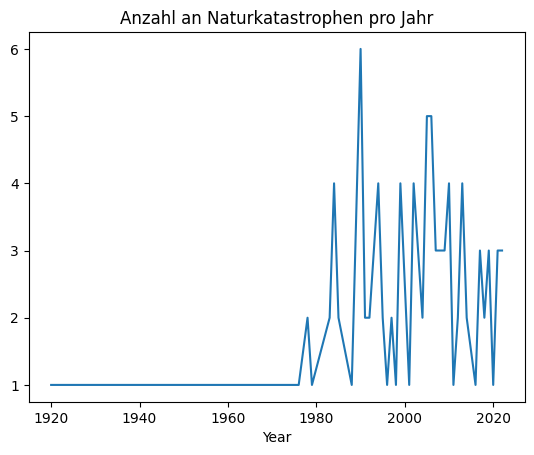

In [106]:
yearly_events =germany_data.groupby('Year')['Total Events'].sum()
yearly_events.plot(kind='line', x='Year', y='Total Events', title='Anzahl an Naturkatastrophen pro Jahr')

**Generelle Funktion**

In [107]:
def plot_evolution(data, country):
    land_data = data[data['Country'] == county]
    yearly_events = land_data.groupby('Year')['Total Events'].sum()
    yearly_events.plot(kind='line', x='Year', y='Total Events', title='Anzahl an Naturkatastrophen pro Jahr')

## Länderdashboard

In [132]:
def plot_pie(country_data):
    country_data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie', title='Anteil an getöten Menschen nach Naturkatastrophentyp')
    plt.show()

In [131]:
def plot_time_evolution(country_data):
    yearly_events = country_data.groupby('Year')['Total Events'].sum()
    yearly_events.plot(kind='line', x='Year', y='Total Events', title='Anzahl an Naturkatastrophen pro Jahr')
    plt.show()

In [128]:
def death_overview(country_data):
    total_deaths = country_data["Total Deaths"].sum()
    print(f'Getötete Menschen seit 1900: {total_deaths:,.0f}')

In [129]:
def compute_anteil(country_total, world_total):
    anteil = round(country_total / (world_total / 100.0), 2)
    print(f'{anteil}% aller Menschen die weltweit von Naturkatastrophen betroffen sind leben hier.')

In [123]:
def analyze(data, country):
    print(f'Naturkatastrophen in {country.upper()} \n')
    country_data = data[data['Country'] == country]
    
    # compute_anteil(country_data['Total Affected'].sum(), data['Total Affected'].sum())
    text = death_overview(country_data)
    plot_pie(country_data)
    plot_time_evolution(country_data)

Naturkatastrophen in BANGLADESH 

Getötete Menschen seit 1900: 2,590,902


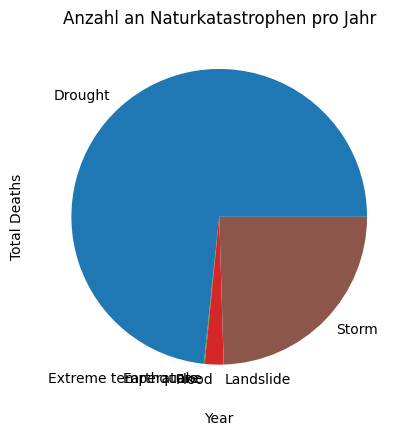

In [130]:
analyze(data, 'Bangladesh')

### Überblick über die Welt

Wie können wir die selbstdefinierte Funktion `analyze()` anpassen, so dass auch eine Gesamtstatistik, die alle Länder der Welt enthält abgefragt werden kann?

In [137]:
def analyze(data, country):
    print(f'Naturkatastrophen in {country.upper()} \n')
    country_data = data[data['Country'] == country]
    if country == 'world':
        country_data = data   
    compute_anteil(country_data['Total Affected'].sum(), data['Total Affected'].sum())
    death_overview(country_data)
    plot_pie(country_data)
    plot_time_evolution(country_data)

Naturkatastrophen in WORLD 

100.0% aller Menschen die weltweit von Naturkatastrophen betroffen sind leben hier.
Getötete Menschen seit 1900: 22,845,977


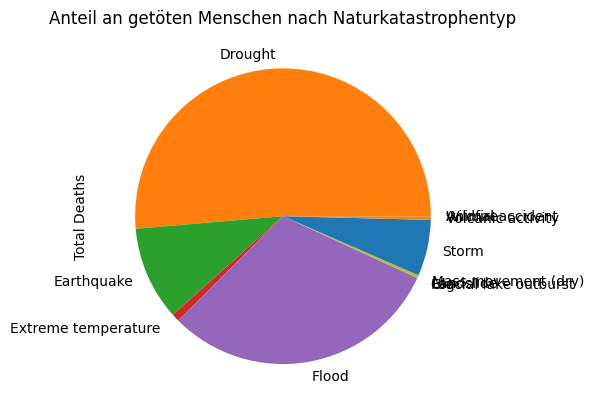

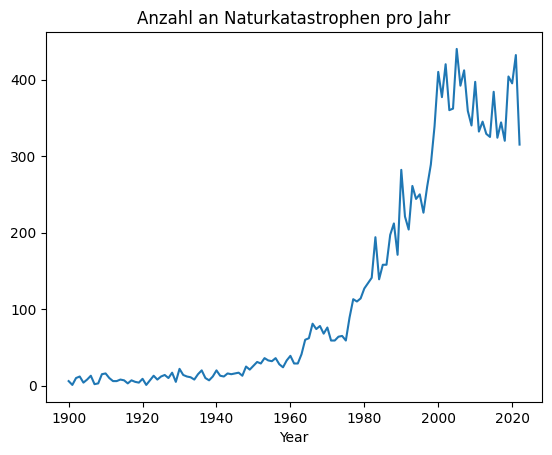

In [136]:
analyze(data, 'world')

# Zeit für Feedback



Link: https://ahaslides.com/HP3D5

![Feedback QR Code](../imgs/qrcode_vl7.png)

